In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


# 1 Importing required libraries and data

In [337]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings("ignore") 

In [338]:
df = pd.read_csv('/content/gdrive/MyDrive/Mukund/MLDL/internship/gramoday/data/Agra-Potato-01JAN-to-31DEC-2020_1.csv')
df.columns = ['district_name', 'market_name', 'commodity', 'variety', 'grade', 'min_price', 'max_price', 'modal_price', 'price_date']

In [339]:
df.head()

,district_name,market_name,commodity,variety,grade,min_price,max_price,modal_price,price_date
0,Agra,Achnera,Potato,Desi,FAQ,900,1000,950,30 Dec 2020
1,Agra,Achnera,Potato,Desi,FAQ,800,900,850,29 Dec 2020
2,Agra,Achnera,Potato,Desi,FAQ,850,950,900,28 Dec 2020
3,Agra,Achnera,Potato,Desi,FAQ,800,900,850,27 Dec 2020
4,Agra,Achnera,Potato,Desi,FAQ,800,900,850,26 Dec 2020


# 2. Data pre-processing / Cleaning

In [340]:
data = df[['market_name', 'variety', 'min_price', 'max_price', 'modal_price']]
data.head()

,market_name,variety,min_price,max_price,modal_price
0,Achnera,Desi,900,1000,950
1,Achnera,Desi,800,900,850
2,Achnera,Desi,850,950,900
3,Achnera,Desi,800,900,850
4,Achnera,Desi,800,900,850


In [341]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   market_name  1827 non-null   object
 1   variety      1827 non-null   object
 2   min_price    1827 non-null   int64 
 3   max_price    1827 non-null   int64 
 4   modal_price  1827 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 71.5+ KB


In [342]:
data.describe()

,min_price,max_price,modal_price
count,1827.000000,1827.000000,1827.000000
mean,1392.799672,1521.559934,1474.332239
std,562.382569,577.775389,555.645961
min,0.000000,0.000000,550.000000
25%,1000.000000,1200.000000,1115.000000
50%,1250.000000,1370.000000,1310.000000
75%,1690.000000,1810.000000,1780.000000
max,3750.000000,3850.000000,3800.000000


In [343]:
market_name = sorted(data['market_name'].unique())
market_name

['Achnera',
 'Agra',
 'Fatehabad',
 'Fatehpur Sikri',
 'Jagnair',
 'Jarar',
 'Khairagarh',
 'Samsabad']

In [344]:
variety = sorted(data['variety'].unique())

In [345]:
variety_gb = data.groupby(data['variety']).mean()
market_gb = data.groupby(data['market_name']).mean()

In [346]:
market_gb

,min_price,max_price,modal_price
market_name,,,
Achnera,1651.633987,1738.921569,1695.212418
Agra,1622.122807,1813.017544,1716.614035
Fatehabad,1347.596899,1430.658915,1385.387597
Fatehpur Sikri,1556.931034,1710.172414,1737.344828
Jagnair,1265.026738,1358.181818,1311.711230
Jarar,1023.904110,1122.123288,1072.671233
Khairagarh,1182.085561,1285.294118,1233.689840
Samsabad,1015.773810,1237.202381,1141.517857


In [347]:
sort_market = market_gb.sort_values(by='modal_price', ascending=False)
sort_market

,min_price,max_price,modal_price
market_name,,,
Fatehpur Sikri,1556.931034,1710.172414,1737.344828
Agra,1622.122807,1813.017544,1716.614035
Achnera,1651.633987,1738.921569,1695.212418
Fatehabad,1347.596899,1430.658915,1385.387597
Jagnair,1265.026738,1358.181818,1311.711230
Khairagarh,1182.085561,1285.294118,1233.689840
Samsabad,1015.773810,1237.202381,1141.517857
Jarar,1023.904110,1122.123288,1072.671233


Text(0.5, 0, 'Modal Price')

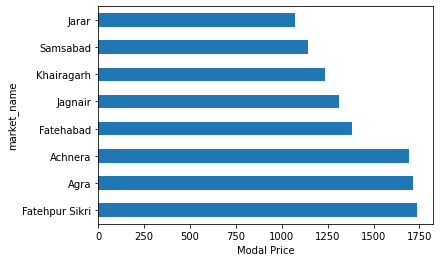

In [348]:
sort_market['modal_price'].plot.barh()
plt.xlabel('Modal Price')

In [349]:
np.mean(market_gb['modal_price'])

1411.7686296765112

In [350]:
variety_gb

,min_price,max_price,modal_price
variety,,,
Desi,1403.719824,1515.940015,1458.888076
Local,1358.427948,1536.681223,1518.788210
Other,1550.000000,1650.000000,1600.000000
Potato,2050.000000,2150.000000,2100.000000


# B.	Identify major markets for the district “Agra” and plot price patterns for each of them. What patterns do you identify? 

In [351]:
new_data = data.copy()
new_data['price_date'] = df['price_date']
new_data['price_date'] = pd.to_datetime(new_data['price_date'])
new_data['price_date'] = pd.to_datetime(new_data['price_date'], format="%Y/%m/%d")
new_data['year_month'] = new_data['price_date'].apply(lambda x: x.strftime('%Y-%m'))
new_data.set_index(new_data['market_name'], inplace= True)
new_data.drop('price_date', axis = 1, inplace = True)

In [352]:
new_data.head()

,market_name,variety,min_price,max_price,modal_price,year_month
market_name,,,,,,
Achnera,Achnera,Desi,900,1000,950,2020-12
Achnera,Achnera,Desi,800,900,850,2020-12
Achnera,Achnera,Desi,850,950,900,2020-12
Achnera,Achnera,Desi,800,900,850,2020-12
Achnera,Achnera,Desi,800,900,850,2020-12


In [353]:
Achnera =  new_data.loc['Achnera']
Achnera_modal_price = Achnera[['modal_price', 'year_month']]
# Achnera_price_date = pd.Series(Achnera['year_month'])

Agra =  new_data.loc['Agra']
Agra_modal_price = Agra['modal_price']
# Agra_price_date = Agra['price_date']


Fatehabad =  new_data.loc['Fatehabad']
Fatehabad_modal_price = Fatehabad['modal_price']
# Fatehabad_price_date = Fatehabad['price_date']


Fatehpur_Sikri =  new_data.loc['Fatehpur Sikri']
Fatehpur_Sikri_modal_price = Fatehpur_Sikri[['modal_price', 'year_month']]
# Fatehpur_Sikri_price_date = Fatehpur_Sikri['price_date']


Jagnair =  new_data.loc['Jagnair']
Jagnair_modal_price = Jagnair[['modal_price', 'year_month']]
# Jagnair_price_date = Jagnair['price_date']


Jarar =  new_data.loc['Jarar']
Jarar_modal_price = Jarar[['modal_price', 'year_month']]
# Jarar_price_date = Jarar['price_date']


Khairagarh =  new_data.loc['Khairagarh']
Khairagarh_modal_price = Khairagarh[['modal_price', 'year_month']]
# Khairagarh_price_date = Khairagarh['price_date']


Samsabad =  new_data.loc['Samsabad']
Samsabad_modal_price = Samsabad[['modal_price', 'year_month']]
# Samsabad_price_date = Samsabad['price_date']

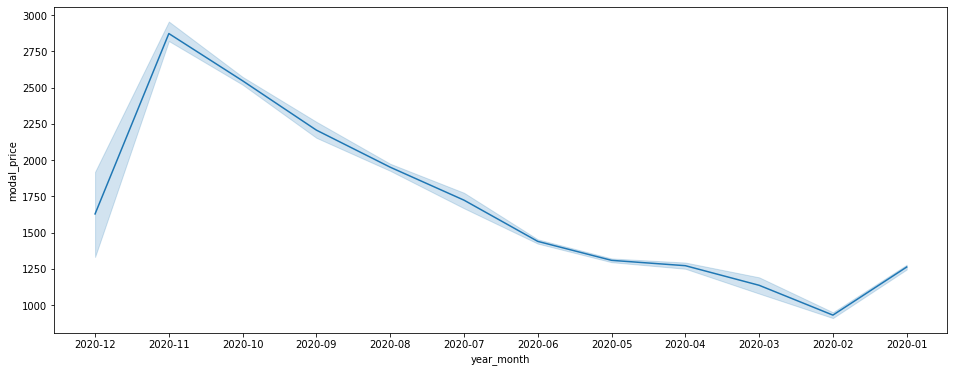

In [354]:
# draw lineplot for Achnera Market

plt.figure(figsize=(16, 6))
sns.lineplot(x="year_month", y="modal_price", data=Achnera,)
plt.show()

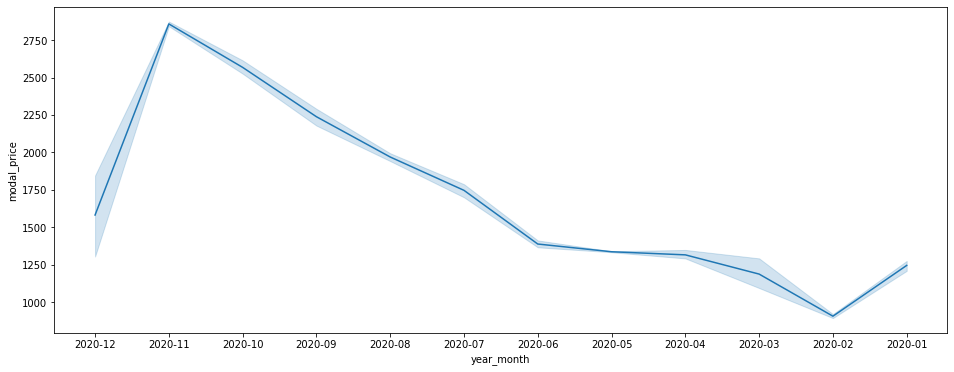

In [355]:
# draw lineplot for Achnera Market

plt.figure(figsize=(16, 6))
sns.lineplot(x="year_month", y="modal_price", data=Agra)
plt.show()

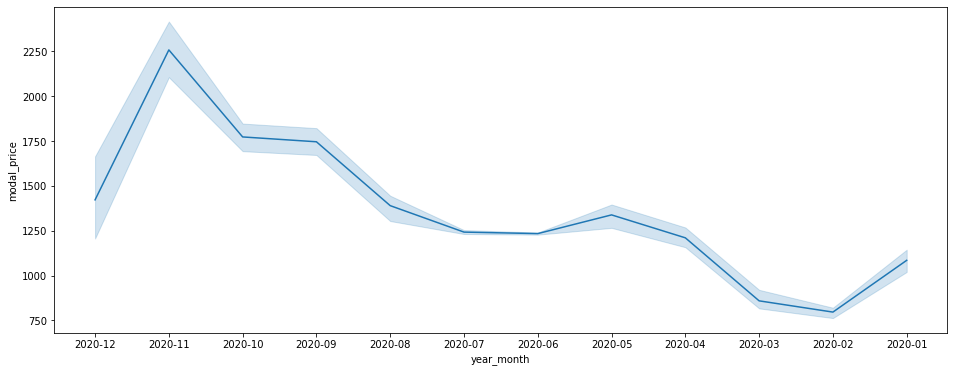

In [356]:
# draw lineplot for Achnera Market

plt.figure(figsize=(16, 6))
sns.lineplot(x="year_month", y="modal_price", data=Fatehabad)
plt.show()

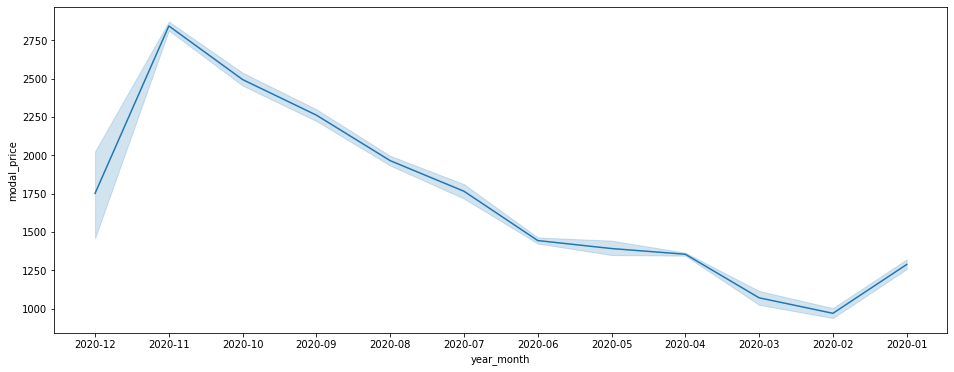

In [357]:
# draw lineplot for Achnera Market

plt.figure(figsize=(16, 6))
sns.lineplot(x="year_month", y="modal_price", data=Fatehpur_Sikri)
plt.show()

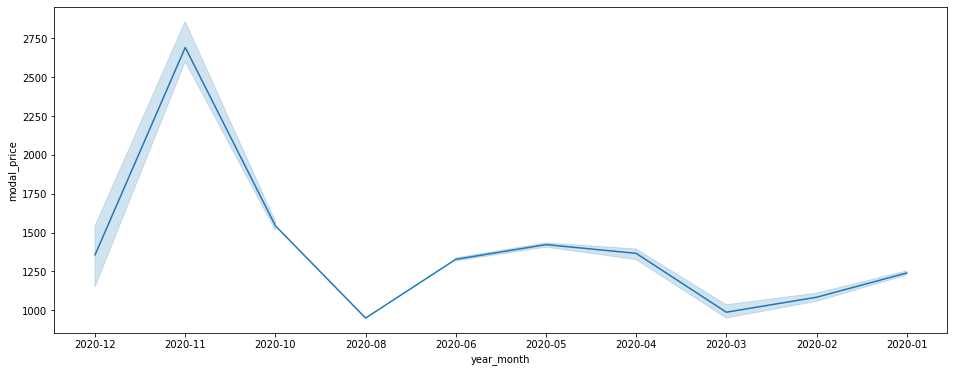

In [358]:
# draw lineplot for Achnera Market

plt.figure(figsize=(16, 6))
sns.lineplot(x="year_month", y="modal_price", data=Jagnair)
plt.show()

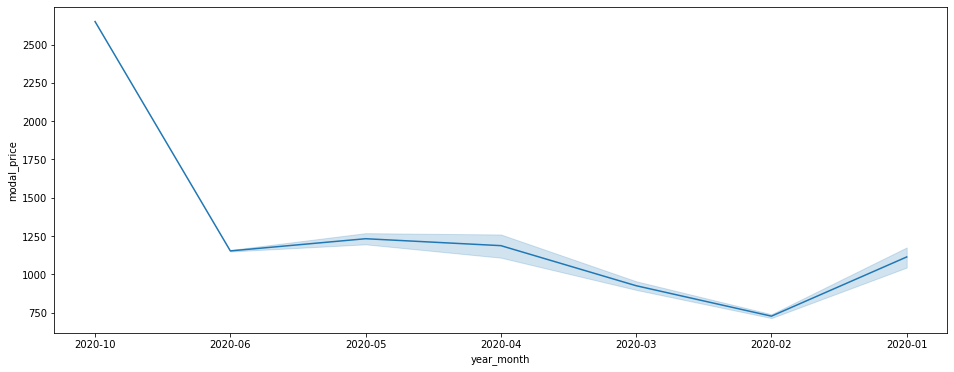

In [359]:
# draw lineplot for Achnera Market

plt.figure(figsize=(16, 6))
sns.lineplot(x="year_month", y="modal_price", data=Jarar)
plt.show()

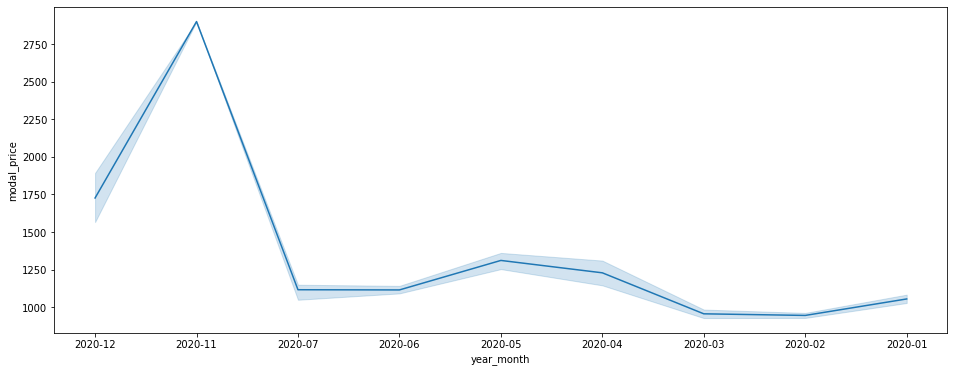

In [360]:
# draw lineplot for Achnera Market

plt.figure(figsize=(16, 6))
sns.lineplot(x="year_month", y="modal_price", data=Khairagarh)
plt.show()

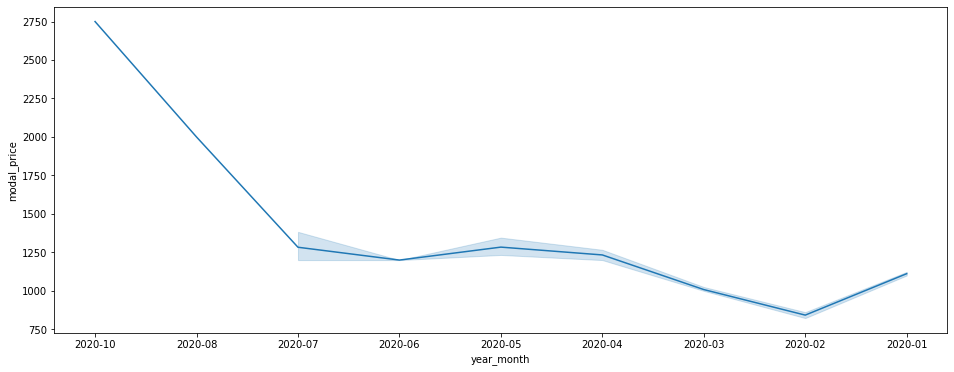

In [361]:
# draw lineplot for Achnera Market

plt.figure(figsize=(16, 6))
sns.lineplot(x="year_month", y="modal_price", data=Samsabad)
plt.show()

# 3. Feature engineering and Feature Selection

### Creation of Dummy variables

In [362]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder',OneHotEncoder(), [0, 1])],remainder='passthrough')
data_transform = pd.DataFrame(ct.fit_transform(data))

In [363]:
data_transform

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,900.0,1000.0,950.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,800.0,900.0,850.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,850.0,950.0,900.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,800.0,900.0,850.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,800.0,900.0,850.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1000.0,1200.0,1100.0
1823,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1000.0,1200.0,1100.0
1824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1100.0,1300.0,1200.0
1825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1100.0,1300.0,1200.0


# 4. Modelling Part


### Framing Independent and Dependent variables

In [364]:
X = data_transform.iloc[:, :14]
y = data_transform.iloc[:, 14:]

### Splitting the data into Training and Testing 

In [365]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state =0)

### Model Fitting on dependent and independent variable

In [366]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold

dtr = DecisionTreeRegressor(max_depth = 2)

model = dtr.fit(X_train,y_train.values.ravel())

In [367]:
r2_score = model.score(X_train,y_train)
print('R2 score = ',r2_score*100,'%')

R2 score =  90.0555908521078 %


In [368]:
r2_score = model.score(X_test,y_test)
print('R2 score = ',r2_score*100,'%')

R2 score =  92.21521254246406 %


## Hyper Parameter Tuning

In [369]:
# Hyper parameters range intialization for tuning 

parameters={"splitter": ["best", "random"],
            "max_depth" : [1, 3, 5, 7, 9, 11, 12],
            "min_samples_leaf": [1, 2, 3, 4, 5, 6,7,8,9,10],
            "min_weight_fraction_leaf": [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
            "max_features": ["auto","log2","sqrt",None],
            "max_leaf_nodes": [None,10,20,30,40,50,60,70,80,90] }

# calculating different regression metrics

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(dtr,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [370]:
# function for calculating how much time take for hyperparameter tuning

def timer(start_time=None):
    if not start_time:
        start_time=datetime.now()
        return start_time
    elif start_time:
        thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)
        tmin,tsec=divmod(temp_sec,60)
        print(thour,":",tmin,':',round(tsec,2))

In [371]:
%%capture
from datetime import datetime

start_time=timer(None)
print(start_time)

model_grid = grid.fit(X_train,y_train)

print(timer(start_time))

In [372]:
print("MSE = "+ str(-model_grid.best_score_))

MSE = 23623.59902983582


# 5. Prediction 

In [373]:
y_pred = model.predict(X_test)
# y_pred

# 6. Loss Functions

### neg_mean_absolute_error

In [374]:
from sklearn.model_selection import cross_val_score 

# neg_mean_squared_error

print('k-fold : ',cross_val_score(model, X_train,y_train, scoring="neg_mean_absolute_error", cv = 10))
mean_score = cross_val_score(model, X_train,y_train, scoring='neg_mean_absolute_error', cv = 10).mean()
std_score = cross_val_score(model, X_train,y_train, scoring="neg_mean_absolute_error", cv = 10).std()

print('Mean Absolute Error')
print(f'Mean Score = {round(-mean_score, 4)} and Standard Deviation = {std_score} ')

k-fold :  [-120.13196262 -121.82590212 -108.20115546 -117.53277096 -113.25746011
 -118.29854514 -114.77088599 -129.32175926 -139.6863041  -130.75926562]
Mean Absolute Error
Mean Score = 121.3584 and Standard Deviation = 8.9193826091024 


### neg_mean_squared_error

In [375]:
from sklearn.model_selection import cross_val_score 

# neg_mean_squared_error

print('k-fold : ',cross_val_score(model, X_train,y_train, scoring="neg_mean_squared_error", cv = 10))
mean_score = cross_val_score(model, X_train,y_train, scoring='neg_mean_squared_error', cv = 10).mean()
std_score = cross_val_score(model, X_train,y_train, scoring="neg_mean_squared_error", cv = 10).std()

print('Mean Squared Error')
print(f'Mean Score = {round(mean_score, 4)} and Standard Deviation = {std_score} ')

k-fold :  [-25956.41027696 -21389.38018096 -17896.78464235 -20804.32725564
 -19987.62195856 -42078.58907366 -18546.52375743 -44371.65078837
 -69918.90922502 -28562.3316721 ]
Mean Squared Error
Mean Score = -30937.3122 and Standard Deviation = 15745.279275948356 


# 7 Check that `data['modal_price']` follows **Noramal Distribution** or not ?

In [377]:
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro


data = y_test.values.ravel()-prediction.ravel()
# normality test
stat, p = shapiro(data)
print('Statistics = %.3f, p = %.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Data looks Gaussian (fail to reject H0)')
else:
	print('Data does not look Gaussian (reject H0)')

Statistics = 0.925, p = 0.000
Data does not look Gaussian (reject H0)


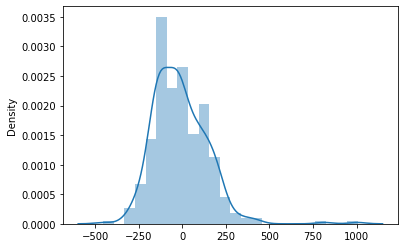

In [376]:
import seaborn as sns
sns.distplot(y_test.values.ravel()-prediction.ravel())

In [379]:
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro


data1 = df['modal_price']
# normality test
stat, p = shapiro(data1)
print('Statistics = %.3f, p = %.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Data looks Gaussian (fail to reject H0)')
else:
	print('Data does not look Gaussian (reject H0)')

Statistics = 0.877, p = 0.000
Data does not look Gaussian (reject H0)


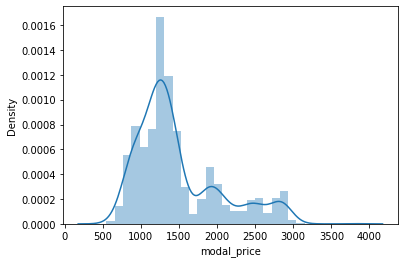

In [380]:
import seaborn as sns
sns.distplot(data1)